<a href="https://colab.research.google.com/github/IdentityLost/Machine-Learning-Geniric-Virus-Backprop/blob/main/ML7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install geopandas

     |████████████████████████████████| 1.0 MB 11.2 MB/s 
     |████████████████████████████████| 6.3 MB 63.2 MB/s 
     |████████████████████████████████| 15.4 MB 57.4 MB/s 


In [ ]:
import geopandas
import pandas as pd
df = geopandas.read_file('https://dtp-stat.ru/media/opendata/moskva.geojson')

In [ ]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 60958 entries, 0 to 60957
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   id                  60958 non-null  int64   
 1   light               60958 non-null  object  
 2   point               60958 non-null  object  
 3   region              60958 non-null  object  
 4   scheme              57525 non-null  object  
 5   address             57294 non-null  object  
 6   category            60958 non-null  object  
 7   datetime            60958 non-null  object  
 8   severity            60958 non-null  object  
 9   dead_count          60958 non-null  int64   
 10  injured_count       60958 non-null  int64   
 11  parent_region       60958 non-null  object  
 12  participants_count  60958 non-null  int64   
 13  geometry            60875 non-null  geometry
dtypes: geometry(1), int64(4), object(9)
memory usage: 6.5+ MB


In [ ]:
df.dropna(axis=0, inplace=True)
df.drop(columns=['id'], inplace=True)
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 54111 entries, 0 to 60957
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   light               54111 non-null  object  
 1   point               54111 non-null  object  
 2   region              54111 non-null  object  
 3   scheme              54111 non-null  object  
 4   address             54111 non-null  object  
 5   category            54111 non-null  object  
 6   datetime            54111 non-null  object  
 7   severity            54111 non-null  object  
 8   dead_count          54111 non-null  int64   
 9   injured_count       54111 non-null  int64   
 10  parent_region       54111 non-null  object  
 11  participants_count  54111 non-null  int64   
 12  geometry            54111 non-null  geometry
dtypes: geometry(1), int64(3), object(9)
memory usage: 5.8+ MB


In [ ]:
df.to_csv('moscow_data.csv', index=False)

In [ ]:
data = pd.read_csv('moscow_data.csv')

In [ ]:
data['category'].unique()

array(['Наезд на пешехода', 'Столкновение',
       'Наезд на лицо, не являющееся участником дорожного движения, осуществляющее производство работ',
       'Наезд на препятствие', 'Падение пассажира', 'Наезд на стоящее ТС',
       'Наезд на велосипедиста',
       'Наезд на лицо, не являющееся участником дорожного движения, осуществляющее какую-либо другую деятельность',
       'Опрокидывание', 'Съезд с дороги',
       'Наезд на внезапно возникшее препятствие',
       'Наезд на лицо, не являющееся участником дорожного движения, осуществляющее несение службы',
       'Иной вид ДТП', 'Наезд на животное', 'Падение груза',
       'Отбрасывание предмета'], dtype=object)

In [ ]:
dict(data['category'].value_counts())

{'Иной вид ДТП': 21,
 'Наезд на велосипедиста': 1346,
 'Наезд на внезапно возникшее препятствие': 14,
 'Наезд на животное': 9,
 'Наезд на лицо, не являющееся участником дорожного движения, осуществляющее какую-либо другую деятельность': 10,
 'Наезд на лицо, не являющееся участником дорожного движения, осуществляющее несение службы': 25,
 'Наезд на лицо, не являющееся участником дорожного движения, осуществляющее производство работ': 48,
 'Наезд на пешехода': 18574,
 'Наезд на препятствие': 3031,
 'Наезд на стоящее ТС': 2752,
 'Опрокидывание': 526,
 'Отбрасывание предмета': 8,
 'Падение груза': 3,
 'Падение пассажира': 1883,
 'Столкновение': 25815,
 'Съезд с дороги': 46}

In [ ]:
data.drop(columns=['point', 'datetime', 'geometry', 'parent_region', 'address'], inplace=True)

In [ ]:
data

,light,region,scheme,category,severity,dead_count,injured_count,participants_count
0,Светлое время суток,Молжаниновский,820,Наезд на пешехода,Тяжёлый,0,1,2
1,Светлое время суток,Бибирево,820,Наезд на пешехода,Легкий,0,2,3
2,Светлое время суток,Южное Медведково,300,Столкновение,Легкий,0,1,3
3,Светлое время суток,Перово,70,Столкновение,Легкий,0,1,3
4,Сумерки,Покровское-Стрешнево,500,Столкновение,Легкий,0,1,2
...,...,...,...,...,...,...,...,...
54106,"В темное время суток, освещение включено",Западное Дегунино,130,Столкновение,Легкий,0,1,2
54107,Светлое время суток,Даниловский,60,Столкновение,Легкий,0,1,2
54108,Сумерки,Останкинский,70,Столкновение,Легкий,0,1,2
54109,"В темное время суток, освещение включено",Академический,740,Наезд на пешехода,Тяжёлый,0,1,2


In [ ]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

for i in data.drop(columns=['scheme', 'dead_count', 'dead_count', 'participants_count']).columns:
  data[i] = lb.fit_transform(data[i])

In [ ]:
data

,light,region,scheme,category,severity,dead_count,injured_count,participants_count
0,4,69,820,7,2,0,1,2
1,4,9,820,7,0,0,2,3
2,4,141,300,14,0,0,1,3
3,4,89,70,14,0,0,1,3
4,5,91,500,14,0,0,1,2
...,...,...,...,...,...,...,...,...
54106,0,33,130,14,0,0,1,2
54107,4,27,60,14,0,0,1,2
54108,5,85,70,14,0,0,1,2
54109,0,0,740,7,2,0,1,2


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=0)
pca_feat = pca.fit_transform(data.drop(columns=['severity']))

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(data.drop(columns=['severity']))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [ ]:
data['clusters'] = kmeans.predict(data.drop(columns=['severity']))

In [ ]:
data

,light,region,scheme,category,severity,dead_count,injured_count,participants_count,clusters
0,4,69,820,7,2,0,1,2,1
1,4,9,820,7,0,0,2,3,1
2,4,141,300,14,0,0,1,3,2
3,4,89,70,14,0,0,1,3,0
4,5,91,500,14,0,0,1,2,2
...,...,...,...,...,...,...,...,...,...
54106,0,33,130,14,0,0,1,2,0
54107,4,27,60,14,0,0,1,2,0
54108,5,85,70,14,0,0,1,2,0
54109,0,0,740,7,2,0,1,2,1


In [ ]:
data['clusters'].value_counts()

1    25933
0    17739
2    10439
Name: clusters, dtype: int64

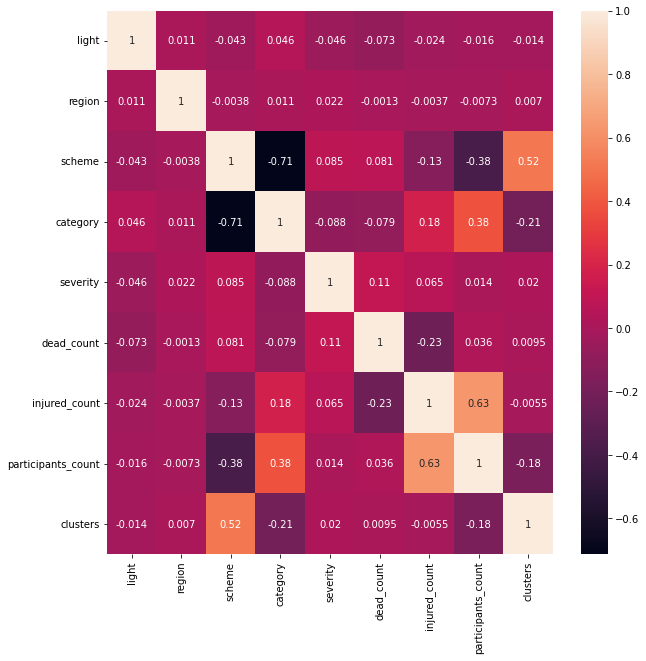

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data.drop(columns=['severity', 'clusters']), data['severity'], test_size=0.20) 

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
estimators = [100, 300, 500]
train_score = []
val_score = []

for estim in estimators:
  gbc = GradientBoostingClassifier(n_estimators=estim, verbose=3)
  gbc.fit(x_train, y_train)
  train_score.append(gbc.score(x_train, y_train))
  val_score.append(gbc.score(x_test, y_test))

      Iter       Train Loss   Remaining Time 
         1       29108.0557            8.30s
         2       28118.7976            9.05s
         3       27417.1552            9.32s
         4       26864.8470            9.24s
         5       26420.7885            9.22s
         6       26054.7059            9.38s
         7       25738.8535            9.31s
         8       25463.7610            9.25s
         9       25229.1692            9.14s
        10       25023.2747            9.01s
        11       24842.1594            8.93s
        12       24685.9967            8.82s
        13       24538.5184            8.69s
        14       24410.5434            8.61s
        15       24298.2846            8.48s
        16       24192.9753            8.37s
        17       24101.3777            8.27s
        18       24021.4472            8.19s
        19       23945.8712            8.12s
        20       23874.0078            8.02s
        21       23808.6734            7.93s
        2

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report
sgd = SGDClassifier(max_iter=2000, tol=1e-2)
sgd.fit(x_train, y_train)
print(classification_report(y_test, sgd.predict(x_test)))

              precision    recall  f1-score   support

           0       0.71      0.98      0.82      7523
           1       1.00      0.16      0.27       515
           2       0.40      0.04      0.08      2785

    accuracy                           0.70     10823
   macro avg       0.70      0.39      0.39     10823
weighted avg       0.64      0.70      0.60     10823



In [ ]:
import pickle
filename = 'Model.sav'
pickle.dump(sgd, open(filename, 'wb'))

In [ ]:
model = pickle.load(open(filename, 'rb'))

In [ ]:
print(model)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=2000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.01,
              validation_fraction=0.1, verbose=0, warm_start=False)


In [ ]:
model.score(x_test, y_test)

0.6997135729465028

In [ ]:
x_test

,light,region,scheme,category,dead_count,injured_count,participants_count
52974,4,113,930,8,0,1,2
35619,0,68,70,14,0,1,3
36033,4,91,750,7,0,1,2
41275,4,90,600,8,0,1,1
7888,4,140,500,14,0,1,3
...,...,...,...,...,...,...,...
19215,4,79,800,7,0,1,2
21543,0,54,70,14,0,1,2
24712,0,55,40,14,0,1,3
29622,0,131,720,7,0,1,2


In [ ]:
pip version

ERROR: unknown command "version"


In [ ]:
pip --version

pip 21.1.3 from /usr/local/lib/python3.7/dist-packages/pip (python 3.7)
